A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

https://www.youtube.com/watch?v=srRhFrSPdvs

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

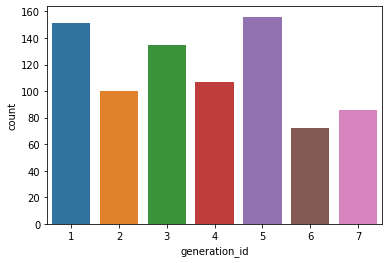

In [6]:
sb.countplot(data = pokemon, x = 'generation_id');

In [8]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [9]:
base_color = sb.color_palette()[0]

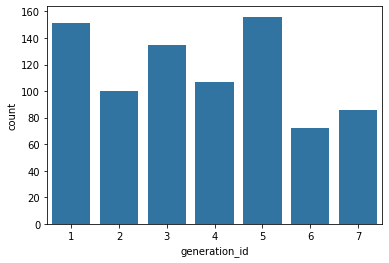

In [10]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

In [11]:
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [12]:
gen_order = pokemon['generation_id'].value_counts().index

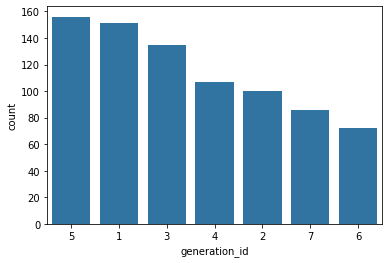

In [14]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

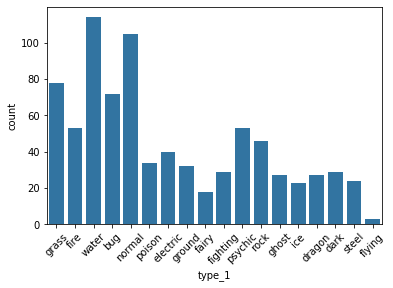

In [17]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 45);

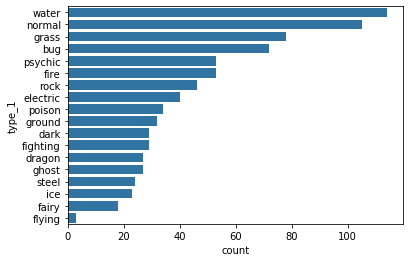

In [21]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

### Absolute vs. Relative Frequency

In [38]:
pokemon

pkmn_types = pokemon.melt(
    id_vars = ['id', 'species'],
    value_vars = ['type_1', 'type_2'],
    var_name = 'type_level',
    value_name = 'type'
).dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [42]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

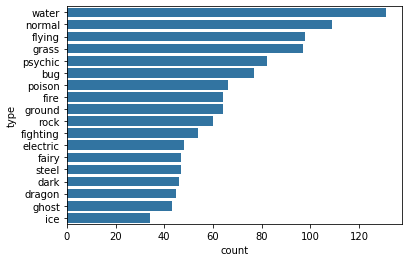

In [47]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [48]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [52]:
tick_props = np.arange(0, max_prop, 0.02)
print(tick_props)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


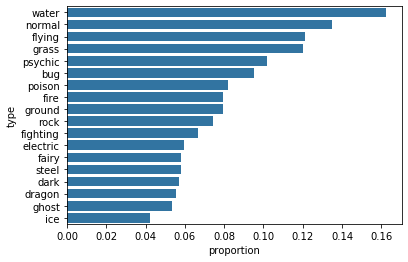

In [56]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('proportion');

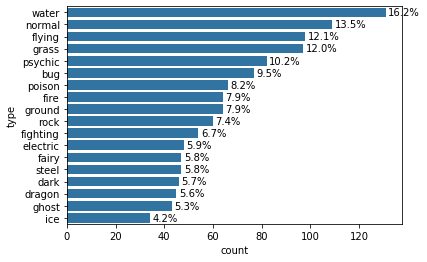

In [64]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    ptc_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, ptc_string, va = 'center');
